Tasks for part 3:
- Predictive modeling
- Time series analysis
- Conclusions

In [1]:
# Disabling the multiple messages generated by the new versions from Pandas and Matplotlib
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Data manipulation and visualization
import math
import numpy as np
import pandas as pd
import matplotlib as m
import matplotlib.pyplot as plt
from scipy import stats

# Machine Learning
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Time series analysis
import pickle
import calendar
import statsmodels
from statsmodels.tsa.arima_model import ARIMA, ARMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.stattools import acf, pacf

# Graphics formatting
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 15,7
plt.style.use('fivethirtyeight')
%matplotlib inline

# Predictive Modeling

In [2]:
# Loading data
df_arrests = pd.read_csv('files/df_arrests_04.csv')

In [3]:
df_arrests.shape

(6226, 26)

In [4]:
df_arrests.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Location,latitude,longitude,marijuana_related,store_0.5_mile_x,store_1_mile_x,store_0.5_mile_y,store_1_mile_y,school_0.5_mile,school_1_mile
0,5568617,2019-03-09,2015.0,6,Hollywood,646,29,M,O,16.0,...,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,7,8,7,8,2,5
1,5568629,2019-03-09,2015.0,6,Hollywood,646,25,M,B,16.0,...,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,7,8,7,8,2,5
2,5607178,2019-04-21,2115.0,7,Wilshire,702,42,M,B,16.0,...,"['34.0838', '-118.3614']",34.0838,-118.3614,poss/sale marij ovr 21 employ per 20/belw,4,13,4,13,4,8
3,5616516,2019-05-01,1045.0,14,Pacific,1494,26,M,B,16.0,...,"['33.9428', '-118.4054']",33.9428,-118.4054,sale/trans >28.5g marijuana or >4g,0,0,0,0,0,0
4,5616188,2019-05-01,5.0,15,N Hollywood,1543,27,M,B,16.0,...,"['34.1667', '-118.3965']",34.1667,-118.3965,sale/trans >28.5g marijuana or >4g,0,1,0,1,3,4


In [7]:
df_arrests.drop(labels = ['store_0.5_mile_y', 'store_1_mile_y'], axis = 1, inplace = True)

In [12]:
df_arrests.rename(axis = 1, mapper = {'store_0.5_mile_x' : 'store_0.5_mile', 'store_1_mile_x' : 'store_1_mile'}, inplace = True)

In [13]:
df_arrests.head(3)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Address,Cross Street,Location,latitude,longitude,marijuana_related,store_0.5_mile,store_1_mile,school_0.5_mile,school_1_mile
0,5568617,2019-03-09,2015.0,6,Hollywood,646,29,M,O,16.0,...,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,7,8,2,5
1,5568629,2019-03-09,2015.0,6,Hollywood,646,25,M,B,16.0,...,CHEROKEE,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,7,8,2,5
2,5607178,2019-04-21,2115.0,7,Wilshire,702,42,M,B,16.0,...,MELROSE AV,FAIRFAX AV,"['34.0838', '-118.3614']",34.0838,-118.3614,poss/sale marij ovr 21 employ per 20/belw,4,13,4,8


In [14]:
# Listing all charge descriptions
charge_description_list = list(df_arrests['Charge Description'].unique())

In [15]:
# Ordering the list
charge_description_list.sort()

In [16]:
charge_description_list

['attempt - sell/furnish/etc marijuana',
 'cultivate >6 marij plants viol envrnt law',
 'cultivating <6 marijuana plants',
 'furnishing marijuana to minor over 14 yrs',
 'give/transport/etc < 28.5 grams marijuana',
 'induce/etc minor to use/sell marijuana',
 'minor poss 28.5+ grams marijuana/school',
 'minor poss < 28.5 grams marijuana/school',
 'poss for sale of marijuana to a minor',
 'poss marijuana or concentrated cannabis',
 'poss of more than 28.5 grams of marijuana',
 'poss open cont/packg marij drivr/passnger',
 'poss/sale marij ovr 21 employ per 20/belw',
 'poss/smoke/ingest marij school/daycare/yc',
 'possess 28.5 grams or less of marijuana',
 'possess 28.5 grams or less of marijuana**',
 'possess marijuana for sale',
 'possess marijuana for sale under age 18',
 'possess of marijuana while driving veh',
 'possession marijuana for sale',
 'possession of marijuana in school',
 'sale/offer to sell/transport marijuana',
 'sale/trans >28.5g marijuana or >4g',
 'sale/transport mari

## Feature Engineering

Creating a target variable, which will be based on whether or not the charge was related to marijuana sale.

In [17]:
# Using map function to identify marijuana sale
target = df_arrests['Charge Description'].map(lambda x: 'sell' if 'sale' in x else x)

In [19]:
# Identifying sale or not
target = target.map(lambda x: 'sell' if 'sell' in x else x)
target = target.map(lambda x: 'not sell' if 'sell' not in x else x)

In [20]:
# Counting the number of examples in each class
target.value_counts(normalize = True)

sell        0.616929
not sell    0.383071
Name: Charge Description, dtype: float64

In [21]:
# Adding the variabe on the dataframe
df_arrests['target'] = target

In [22]:
# Encoding the variable
df_arrests['target'] = df_arrests['target'].map(lambda x: 1 if x == 'sell' else 0)

In [28]:
df_arrests.head()

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,...,Cross Street,Location,latitude,longitude,marijuana_related,store_0.5_mile,store_1_mile,school_0.5_mile,school_1_mile,target
0,5568617,2019-03-09,2015.0,6,Hollywood,646,29,M,O,16.0,...,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,7,8,2,5,1
1,5568629,2019-03-09,2015.0,6,Hollywood,646,25,M,B,16.0,...,HOLLYWOOD,"['34.1016', '-118.335']",34.1016,-118.3350,possession marijuana for sale,7,8,2,5,1
2,5607178,2019-04-21,2115.0,7,Wilshire,702,42,M,B,16.0,...,FAIRFAX AV,"['34.0838', '-118.3614']",34.0838,-118.3614,poss/sale marij ovr 21 employ per 20/belw,4,13,4,8,1
3,5616516,2019-05-01,1045.0,14,Pacific,1494,26,M,B,16.0,...,NaN,"['33.9428', '-118.4054']",33.9428,-118.4054,sale/trans >28.5g marijuana or >4g,0,0,0,0,1
4,5616188,2019-05-01,5.0,15,N Hollywood,1543,27,M,B,16.0,...,WEDDINGTON,"['34.1667', '-118.3965']",34.1667,-118.3965,sale/trans >28.5g marijuana or >4g,0,1,3,4,1


In [29]:
# Checking correlation between the two dispensary distance variables
df_arrests[['store_0.5_mile', 'store_1_mile']].corr()

,store_0.5_mile,store_1_mile
store_0.5_mile,1.000000,0.834965
store_1_mile,0.834965,1.000000


In [30]:
# Checking correlation between the two school distance variables
df_arrests[['school_0.5_mile', 'school_1_mile']].corr()

,school_0.5_mile,school_1_mile
school_0.5_mile,1.000000,0.779701
school_1_mile,0.779701,1.000000


The variables are highly correlated, so one of them will need to be dropped.
I'll also drop some other variables which shouldn't be part of the model, such as the 'Charge Description' which was used to generate the target, as well as the 'Arrest Date', since the goal will be predicting how things might have played out with a law change.
I'll keep the latitude and longitude variables and remove most other variables which refer to location.

In [31]:
df_arrests.columns

Index(['Report ID', 'Arrest Date', 'Time', 'Area ID', 'Area Name',
       'Reporting District', 'Age', 'Sex Code', 'Descent Code',
       'Charge Group Code', 'Charge Group Description', 'Arrest Type Code',
       'Charge', 'Charge Description', 'Address', 'Cross Street', 'Location',
       'latitude', 'longitude', 'marijuana_related', 'store_0.5_mile',
       'store_1_mile', 'school_0.5_mile', 'school_1_mile', 'target'],
      dtype='object')

In [38]:
X = df_arrests.drop(['Report ID', 'Arrest Date', 'Area ID', 'Reporting District',
                     'Charge Group Code', 'Charge Group Description', 'Charge',
                     'Charge Description', 'Address', 'Cross Street', 'Location',
                     'marijuana_related', 'store_0.5_mile', 'school_0.5_mile',
                     'target'], axis = 1)

In [39]:
x

,Time,Area Name,Age,Sex Code,Descent Code,Arrest Type Code,latitude,longitude,store_1_mile,school_1_mile
0,2015.0,Hollywood,29,M,O,F,34.1016,-118.3350,8,5
1,2015.0,Hollywood,25,M,B,F,34.1016,-118.3350,8,5
2,2115.0,Wilshire,42,M,B,F,34.0838,-118.3614,13,8
3,1045.0,Pacific,26,M,B,F,33.9428,-118.4054,0,0
4,5.0,N Hollywood,27,M,B,F,34.1667,-118.3965,1,4
...,...,...,...,...,...,...,...,...,...,...
6221,1020.0,77th Street,57,M,B,M,33.9922,-118.3276,4,11
6222,1020.0,77th Street,57,M,B,M,33.9922,-118.3276,4,11
6223,1531.0,Pacific,36,M,O,F,33.9432,-118.4013,0,0
6224,1130.0,Pacific,22,M,B,F,33.9420,-118.4095,0,0


In [40]:
# Creating dummy variables for the categorical variables
X = pd.get_dummies(X)

In [41]:
X.head()

,Time,Age,latitude,longitude,store_1_mile,school_1_mile,Area Name_77th Street,Area Name_Central,Area Name_Devonshire,Area Name_Foothill,...,Descent Code_F,Descent Code_G,Descent Code_H,Descent Code_O,Descent Code_P,Descent Code_W,Descent Code_X,Arrest Type Code_F,Arrest Type Code_I,Arrest Type Code_M
0,2015.0,29,34.1016,-118.3350,8,5,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,2015.0,25,34.1016,-118.3350,8,5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2115.0,42,34.0838,-118.3614,13,8,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1045.0,26,33.9428,-118.4054,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5.0,27,34.1667,-118.3965,1,4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
# Target (y)
Y = df_arrests['target']

In [43]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [46]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, test_size = 0.25)

In [47]:
# Create model
model_01 = LogisticRegression()

In [48]:
model_01.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
# Evaluate accuracy 
acc_train = model_01.score(X_train, Y_train)
print(f'Train accuracy: {round(acc_train, 2) * 100}')

acc_test = model_01.score(X_test, Y_test)
print(f'Test accuracy: {round(acc_test, 2) * 100}')

Train accuracy: 89.0
Test accuracy: 88.0


The accuracy is quite good

In [53]:
# Extracting the coeficients
beta = model_01.coef_[0]

In [54]:
model_01.coef_[0]

array([ 5.42813279e-04, -4.39057310e-02, -5.87499278e-01, -1.63918853e-01,
       -4.69835427e-03,  2.51708653e-02,  1.00283280e-01,  2.55536941e-01,
       -2.69077267e-01, -3.00366987e-01,  2.80027493e-01, -1.54515871e-01,
        2.32027004e-01, -2.88713383e-01, -2.08952561e-01, -9.62976074e-02,
       -1.19109643e-01, -2.58349585e-02,  8.01728302e-01, -2.44371498e-01,
        1.42997356e+00,  2.63020935e-02, -1.81512868e-01, -8.49705021e-01,
        9.22610897e-03, -3.00631283e-01, -9.20285196e-02,  5.70914016e-01,
       -5.66926706e-01, -7.25988136e-02,  9.81864938e-01,  4.96319703e-03,
        9.15791505e-03,  0.00000000e+00,  2.28613040e-02, -4.80238751e-01,
        0.00000000e+00, -4.62022479e-01,  0.00000000e+00,  3.99179124e+00,
       -3.03612676e+00, -9.51677171e-01])

In [55]:
# Attributes
attributes = list(X.columns)

In [56]:
# Creating a dataframe matching attributes to their coefficients
beta_df = pd.DataFrame({'attributes': attributes, 'beta': beta})
beta_df.set_index('attributes', inplace = True)

In [58]:
beta_df.head()

,beta
attributes,
Time,0.000543
Age,-0.043906
latitude,-0.587499
longitude,-0.163919
store_1_mile,-0.004698


In [59]:
# Extracting the log of the odds
beta_df['log_odds'] = beta_df['beta'].map(lambda x: np.exp(x))

In [60]:
# Descending order
beta_df = beta_df.sort_values('log_odds', ascending = False)

In [61]:
beta_df.head(10)

,beta,log_odds
attributes,,
Arrest Type Code_F,3.991791,54.151801
Area Name_Southeast,1.429974,4.178589
Descent Code_B,0.981865,2.669430
Area Name_Pacific,0.801728,2.229391
Sex Code_F,0.570914,1.769884
Area Name_Harbor,0.280027,1.323166
Area Name_Central,0.255537,1.291155
Area Name_Hollywood,0.232027,1.261154
Area Name_77th Street,0.100283,1.105484


In [62]:
# Checking if the coeficients for the distance variables: school
beta_df[beta_df.index == 'school_1_mile']

,beta,log_odds
attributes,,
school_1_mile,0.025171,1.02549


In [63]:
# Checking if the coeficients for the distance variables: dispensary
beta_df[beta_df.index == 'store_1_mile']

,beta,log_odds
attributes,,
store_1_mile,-0.004698,0.995313


In [65]:
# Extracting the probabilities to make a 'confidence plot'
prob_arrest_sale = model_01.predict_proba(X_test)[:,1]

In [66]:
prob_arrest_sale

array([0.98259978, 0.13338748, 0.02145263, ..., 0.22214757, 0.03333186,
       0.95810141])

In [68]:
# Create dataframe with actual values versus predicted probabilities (1 = sale arrest)
pred_df = pd.DataFrame({'true_values': Y_test, 'predicted_values':prob_arrest_sale})

In [69]:
pred_df

,true_values,predicted_values
2332,1,0.982600
922,0,0.133387
2048,0,0.021453
3948,1,0.974726
1371,0,0.010254
...,...,...
2299,1,0.935365
4812,1,0.978600
744,0,0.222148
1261,0,0.033332


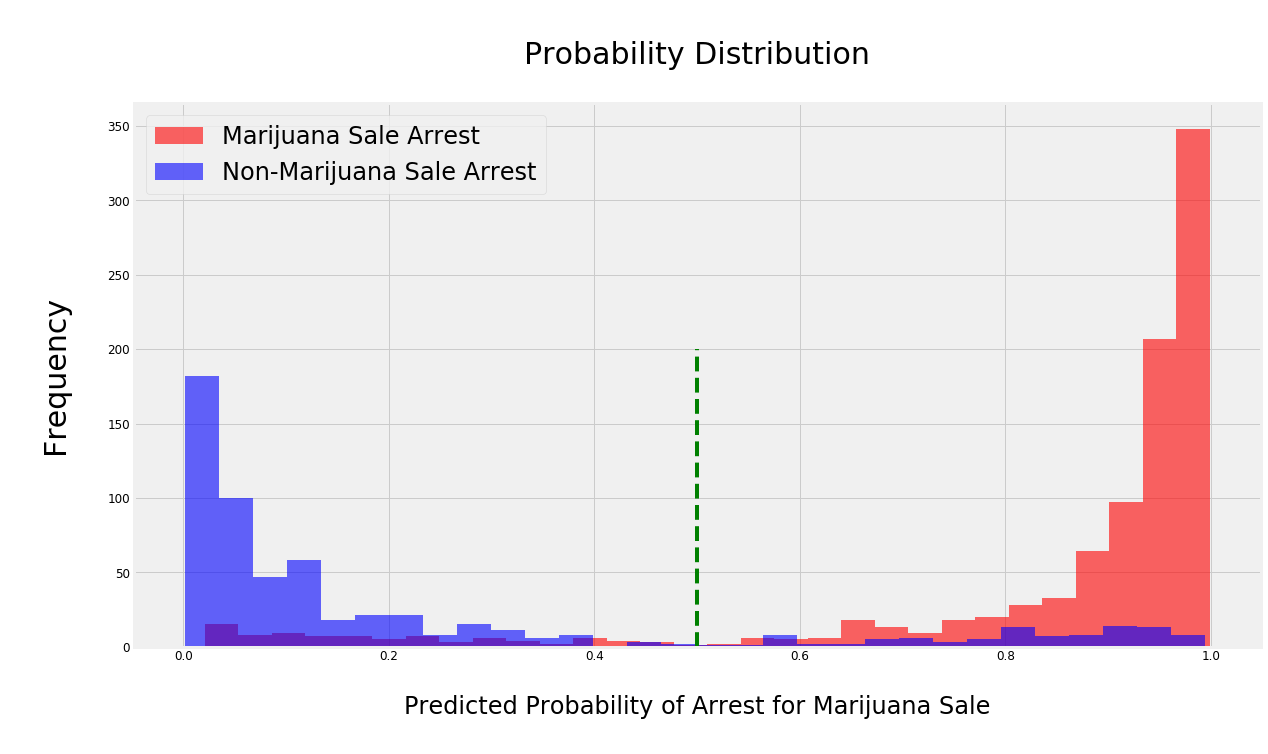

In [72]:
# Plotting the probability distribuition

# Figure
plt.figure(figsize = (18,10))

# Histogram of real values x predicted values for class 1
plt.hist(pred_df[pred_df['true_values'] == 1]['predicted_values'], 
         bins = 30, 
         color = 'r', 
         alpha = 0.6, 
         label = 'Marijuana Sale Arrest')

# Histogram of real values x predicted values for class 0
plt.hist(pred_df[pred_df['true_values'] == 0]['predicted_values'], 
         bins = 30, 
         color = 'blue', 
         alpha = 0.6, 
         label = 'Non-Marijuana Sale Arrest')

# Center line to split the plot
plt.vlines(x = 0.5, ymin = 0, ymax = 200, color = 'green', linestyle = '--')

# Labels and Legend
plt.title('\nProbability Distribution\n', fontsize = 30)
plt.ylabel('\nFrequency\n', fontsize = 30)
plt.xlabel('\nPredicted Probability of Arrest for Marijuana Sale\n', fontsize = 24)
plt.legend(fontsize = 24);

## Arrest Probability x Nearby Police Department

Does having a police department nearby alters the result?

In [73]:
# Extracting the coeficients per area name
beta_df_area = beta_df[beta_df.index.str.contains('Area Name')].head(8)

In [77]:
beta_df_area.head()

,beta,log_odds
attributes,,
Area Name_Southeast,1.429974,4.178589
Area Name_Pacific,0.801728,2.229391
Area Name_Harbor,0.280027,1.323166
Area Name_Central,0.255537,1.291155
Area Name_Hollywood,0.232027,1.261154


The Los Angeles departments are registered here:

http://www.lapdonline.org/our_communities/content_basic_view/6279

Manually extacting their geolocation coordinates:

In [78]:
# Create dataframe for geolocation data of LAPD
LAPD = pd.DataFrame()

In [79]:
LAPD['latitude'] = [33.9383761,
                       34.097986,
                       33.9920067,
                       34.0443028,
                       33.7584097,
                       34.050264,
                       34.1195162,
                       34.1842023]

In [80]:
LAPD['longitude'] = [-118.2749244,
                        -118.331013,
                        -118.4199295,
                        -118.4509833,
                        -118.2880336,
                        -118.291531,
                        -118.2497385,
                        -118.3021552]

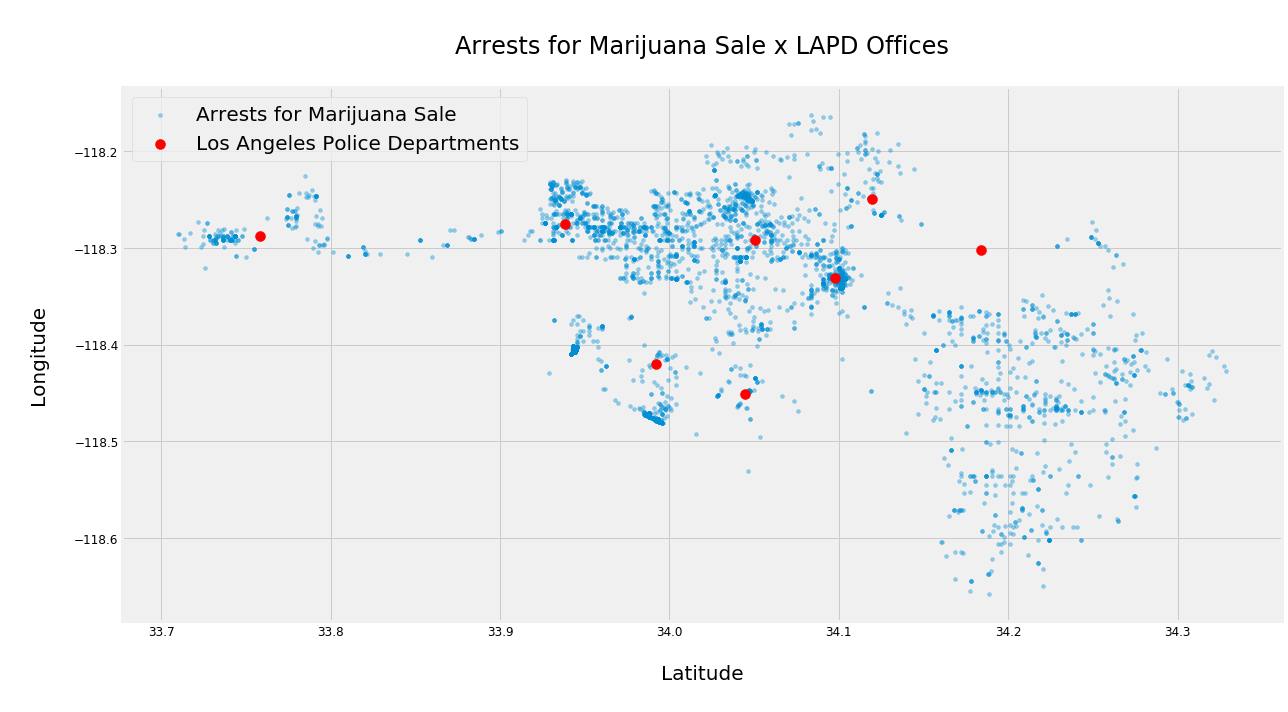

In [81]:
# Plot for class 1 with main attributes versus marijuana arrests

# Figure
fig, ax = plt.subplots(figsize = (18,10))

# Plot
plt.scatter(df_arrests[df_arrests['target'] == 1]['latitude'], 
            df_arrests[df_arrests['target'] == 1]['longitude'], 
            s = 15, 
            alpha = 0.4,
            label = 'Arrests for Marijuana Sale')

# Títulos, labels e legenda
ax.scatter(LAPD['latitude'], LAPD['longitude'], color = 'red', label = 'Los Angeles Police Departments', s = 100)
plt.title('\nArrests for Marijuana Sale x LAPD Offices\n', fontsize = 24)
plt.xlabel('\nLatitude\n', fontsize = 20)
plt.ylabel('\nLongitude\n', fontsize = 20)
ax.legend(fontsize = 20)
plt.tight_layout()

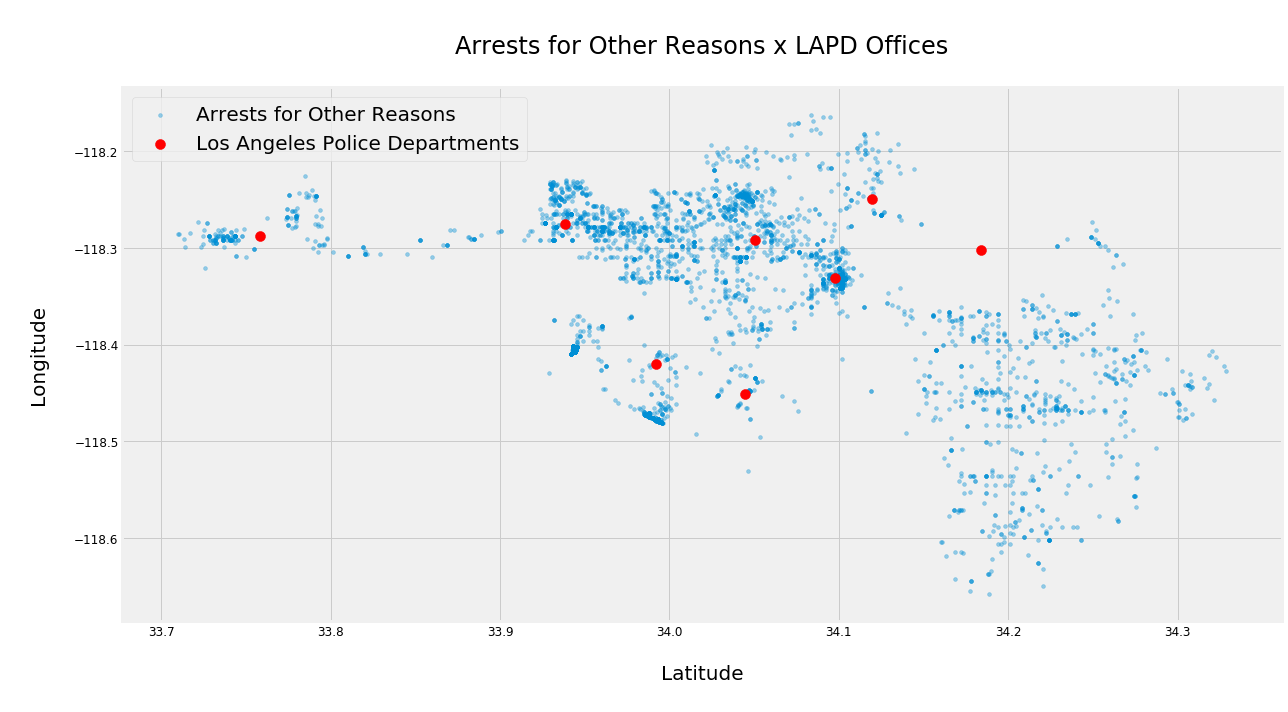

In [82]:
# Plot for class 1 with main attributes versus marijuana arrests

# Figure
fig, ax = plt.subplots(figsize = (18,10))

# Plot
plt.scatter(df_arrests[df_arrests['target'] == 1]['latitude'], 
            df_arrests[df_arrests['target'] == 1]['longitude'], 
            s = 15, 
            alpha = 0.4,
            label = 'Arrests for Other Reasons')

# Títulos, labels e legenda
ax.scatter(LAPD['latitude'], LAPD['longitude'], color = 'red', label = 'Los Angeles Police Departments', s = 100)
plt.title('\nArrests for Other Reasons x LAPD Offices\n', fontsize = 24)
plt.xlabel('\nLatitude\n', fontsize = 20)
plt.ylabel('\nLongitude\n', fontsize = 20)
ax.legend(fontsize = 20)
plt.tight_layout()

#### Conclusion

The fear of exposing children to marijuana doesn't seem to be a factor. There are two classes: selling and not selling marijuana, and the argument was that marijuana sales expose more children to it. The variable **school_1_mile** é the count of schools which are whithin a 1 mile range of each arrest. Given the log chances of **school_1_mile** being roughly equal to one, having a school in a 1 mile range from an arrest is as likely as the arrest being related to the sale as to other causes.